# Data Dictionary
**Variable** Meaning	Levels</br>
**Age**	Age of the employee	</br>
**Attrition**	Whether the employee left in the previous year or not	</br>
**BusinessTravel**	How frequently the employees travelled for business purposes in the last year	</br>
**Department**	Department in company	</br>
**DistanceFromHome**	Distance from home in kms	</br>
**Education**	Education Level</br>
        1 'Below College'
		2 'College'
		3 'Bachelor'
		4 'Master'
		5 'Doctor'</br>
**EducationField**	Field of education	</br>
**EmployeeCount**	Employee count	</br>
**EmployeeNumber**	Employee number/id	</br>
**EnvironmentSatisfaction**	Work Environment Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**Gender**	Gender of employee	</br>
**JobInvolvement**	Job Involvement Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**JobLevel**	Job level at company on a scale of 1 to 5	</br>
**JobRole**	Name of job role in company	</br>
**JobSatisfaction**	Job Satisfaction Level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**MaritalStatus**	Marital status of the employee	</br>
**MonthlyIncome**	Monthly income in rupees per month	</br>
**NumCompaniesWorked**	Total number of companies the employee has worked for	</br>
**Over18**	Whether the employee is above 18 years of age or not	</br>
**PercentSalaryHike**	Percent salary hike for last year	</br>
**PerformanceRating**	Performance rating for last year	</br>
        1 'Low'
		2 'Good'
		3 'Excellent'
		4 'Outstanding'</br>
**RelationshipSatisfaction**	Relationship satisfaction level</br>
        1 'Low'
		2 'Medium'
		3 'High'
		4 'Very High'</br>
**StandardHours**	Standard hours of work for the employee	</br>
**StockOptionLevel**	Stock option level of the employee	</br>
**TotalWorkingYears**	Total number of years the employee has worked so far	</br>
**TrainingTimesLastYear**	Number of times training was conducted for this employee last year	</br>
**WorkLifeBalance**	Work life balance level	</br>
        1 'Bad'
		2 'Good'
		3 'Better'
		4 'Best'</br>
**YearsAtCompany**	Total number of years spent at the company by the employee	
**YearsSinceLastPromotion**	Number of years since last promotion	
**YearsWithCurrManager**	Number of years under current manager	

In [1]:
# Common imports
import sqlite3
import pandas as pd
import numpy as np
import os
import seaborn as sns
sns.set()
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

In [3]:
conn = sqlite3.connect("data/hr_data.db")
employee_survey = pd.read_sql_query("select * from employee_survey_data", conn)
general_data = pd.read_sql_query("select * from general_data", conn)
manager_survey = pd.read_sql_query("select * from manager_survey_data", conn)
in_time = pd.read_sql_query("select * from in_time", conn)
out_time = pd.read_sql_query("select * from out_time", conn)

all_data = pd.read_sql_query("select *, Case when Attrition ='Yes' then 1 else 0 end as 'Attr' from general_data g join employee_survey_data e on g.EmployeeID=e.EmployeeID join manager_survey_data m on g.EmployeeID=m.EmployeeID Where EnvironmentSatisfaction Not Like 'NA' AND JobSatisfaction Not Like 'NA' AND WorkLifeBalance Not Like 'NA' AND TotalWorkingYears Not Like 'NA' AND NumCompaniesWorked Not Like 'NA'", conn)
all_data['JobSatisfaction'] = all_data['JobSatisfaction'].astype(np.int64)
all_data['WorkLifeBalance'] = all_data['WorkLifeBalance'].astype(np.int64)
all_data['EnvironmentSatisfaction'] = all_data['EnvironmentSatisfaction'].astype(np.int64)

In [4]:
#drop the useless columns:
all_data.drop(['EmployeeCount','EmployeeID','StandardHours','Over18'],axis=1, inplace = True)

In [5]:
## Monthly salaries are in rupees 'INR'
from forex_python.converter import CurrencyRates

In [6]:
c = CurrencyRates()
c.get_rates('USD')

{'GBP': 0.8208635023,
 'HKD': 7.8367748279,
 'IDR': 14265.0040225261,
 'ILS': 3.4940556003,
 'DKK': 6.6723875927,
 'INR': 70.8098685975,
 'CHF': 0.9760436221,
 'MXN': 19.5496558505,
 'CZK': 22.9972289264,
 'SGD': 1.380262805,
 'THB': 30.7446142844,
 'HRK': 6.6005184589,
 'EUR': 0.8938946992,
 'MYR': 4.1870027711,
 'NOK': 8.8982747832,
 'CNY': 7.0189505676,
 'BGN': 1.7482792527,
 'PHP': 52.0863502279,
 'PLN': 3.8543845535,
 'ZAR': 14.8060248503,
 'CAD': 1.3216233128,
 'ISK': 122.0166264414,
 'BRL': 3.941986234,
 'RON': 4.2281219272,
 'NZD': 1.52614642,
 'TRY': 5.5337445249,
 'JPY': 106.4628586752,
 'RUB': 65.0734781443,
 'KRW': 1213.3011531242,
 'USD': 1.0,
 'AUD': 1.4719764012,
 'HUF': 290.8286403862,
 'SEK': 9.58854027}

In [7]:
ex_rate = c.convert('USD', 'INR', .01)
ex_rate

0.708098685975

In [8]:
all_data['MonthlyIncome'].head()

0    131160
1     41890
2    193280
3     83210
4     23420
Name: MonthlyIncome, dtype: int64

In [9]:
all_data['MonthlyIncome'].describe()

count      4300.000000
mean      65059.844186
std       47045.398914
min       10090.000000
25%       29260.000000
50%       49360.000000
75%       83802.500000
max      199990.000000
Name: MonthlyIncome, dtype: float64

In [10]:
all_data['MonthlyIncomeUSD'] = all_data['MonthlyIncome']*ex_rate
all_data['MonthlyIncomeUSD'].head()

0     92874.223652
1     29662.253955
2    136861.314025
3     58920.891660
4     16583.671226
Name: MonthlyIncomeUSD, dtype: float64

In [11]:
all_data['MonthlyIncomeUSD'].describe()

count      4300.000000
mean      46068.790178
std       33312.785152
min        7144.715741
25%       20718.967552
50%       34951.751140
75%       59340.440131
max      141612.656208
Name: MonthlyIncomeUSD, dtype: float64

In [12]:
hr_data_num = all_data[['Age','DistanceFromHome', 'JobInvolvement','PerformanceRating',
                       'Education', 'JobLevel', 'PercentSalaryHike','EnvironmentSatisfaction','WorkLifeBalance','YearsSinceLastPromotion',
                        'MonthlyIncomeUSD', 'NumCompaniesWorked', 'YearsAtCompany', 'TotalWorkingYears', 'YearsWithCurrManager',
                        'StockOptionLevel', 'TrainingTimesLastYear']].copy()
hr_data_num.head()

,Age,DistanceFromHome,JobInvolvement,PerformanceRating,Education,JobLevel,PercentSalaryHike,EnvironmentSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,MonthlyIncomeUSD,NumCompaniesWorked,YearsAtCompany,TotalWorkingYears,YearsWithCurrManager,StockOptionLevel,TrainingTimesLastYear
0,51,6,3,3,2,1,11,3,2,0,92874.223652,1,1,1,0,0,6
1,31,10,2,4,1,1,23,3,4,1,29662.253955,0,5,6,4,1,3
2,32,17,3,3,4,4,15,2,1,0,136861.314025,1,5,5,3,3,2
3,38,2,2,3,5,3,11,4,3,7,58920.891660,3,8,13,5,3,5
4,32,10,3,3,1,1,12,4,3,0,16583.671226,4,6,9,4,2,2


In [13]:
#Copy categorical data
hr_data_cat = all_data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole',
                       'MaritalStatus', 'JobSatisfaction',
                       'PerformanceRating']].copy()
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,JobSatisfaction,PerformanceRating
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,4,3
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,2,4
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,2,3
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,4,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,1,3


In [14]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,JobSatisfaction,PerformanceRating
0,0,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,4,3
1,1,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,2,4
2,0,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,2,3
3,0,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,4,3
4,0,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,1,3


In [15]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,JobSatisfaction,PerformanceRating,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,4,3,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2,4,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,3,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,4,3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,3,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
hr_data_final = pd.concat([hr_data_num, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DistanceFromHome,JobInvolvement,PerformanceRating,Education,JobLevel,PercentSalaryHike,EnvironmentSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,3,3,2,1,11,3,2,0,...,0,0,0,0,0,0,0,0,1,0
1,31,10,2,4,1,1,23,3,4,1,...,0,0,0,0,1,0,0,0,0,1
2,32,17,3,3,4,4,15,2,1,0,...,0,0,0,0,0,1,0,0,1,0
3,38,2,2,3,5,3,11,4,3,7,...,0,0,0,0,0,0,0,0,1,0
4,32,10,3,3,1,1,12,4,3,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)

#create the train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

#Create the model and train
model = RandomForestClassifier()
model.fit(X_train,y_train)

#predict the results for test
test_pred = model.predict(X_test)

#test the accuracy
accuracy_score(y_test, test_pred)

/Users/siwoolee/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9715116279069768

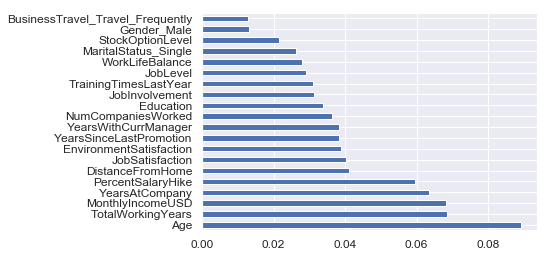

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

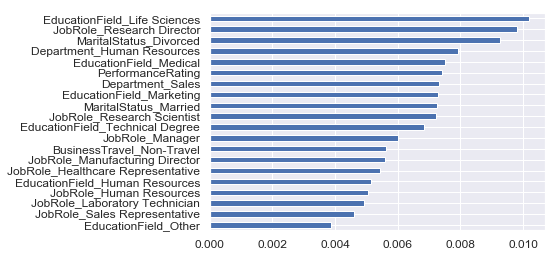

In [19]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nsmallest(20)
feat_importances.plot(kind='barh')